<a href="https://colab.research.google.com/github/vvrgit/Aquaculture/blob/main/Aquaculture_Data_Preprocessing_Fish_Species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv("/content/realfishdataset - Kaggle.csv")
data.head()

,ph,temperature,turbidity,fish
0,6.0,27.0,4.0,katla
1,7.6,28.0,5.9,sing
2,7.8,27.0,5.5,sing
3,6.5,31.0,5.5,katla
4,8.2,27.0,8.5,prawn


In [ ]:
stats=data.describe()
file_name = 'realtimefish.xlsx'
stats.to_excel(file_name)

<Axes: >

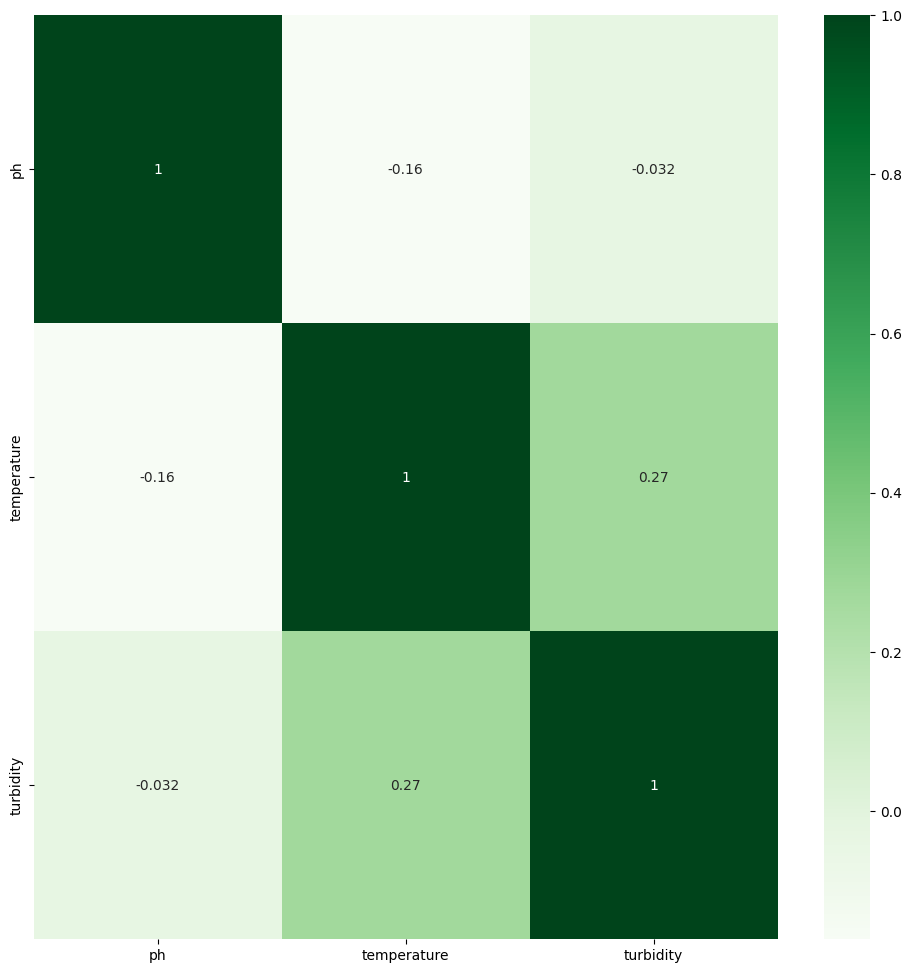

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
data1=data
data1.pop("fish")
matrix = data1.corr()

# plotting correlation matrix
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(matrix, cmap="Greens", annot=True)

In [ ]:
data=pd.read_csv("/content/realfishdataset - Kaggle.csv")
data.head()

,ph,temperature,turbidity,fish
0,6.0,27.0,4.0,katla
1,7.6,28.0,5.9,sing
2,7.8,27.0,5.5,sing
3,6.5,31.0,5.5,katla
4,8.2,27.0,8.5,prawn


In [ ]:
data.isnull().sum()

,0
ph,0
temperature,0
turbidity,0
fish,0


<Axes: >

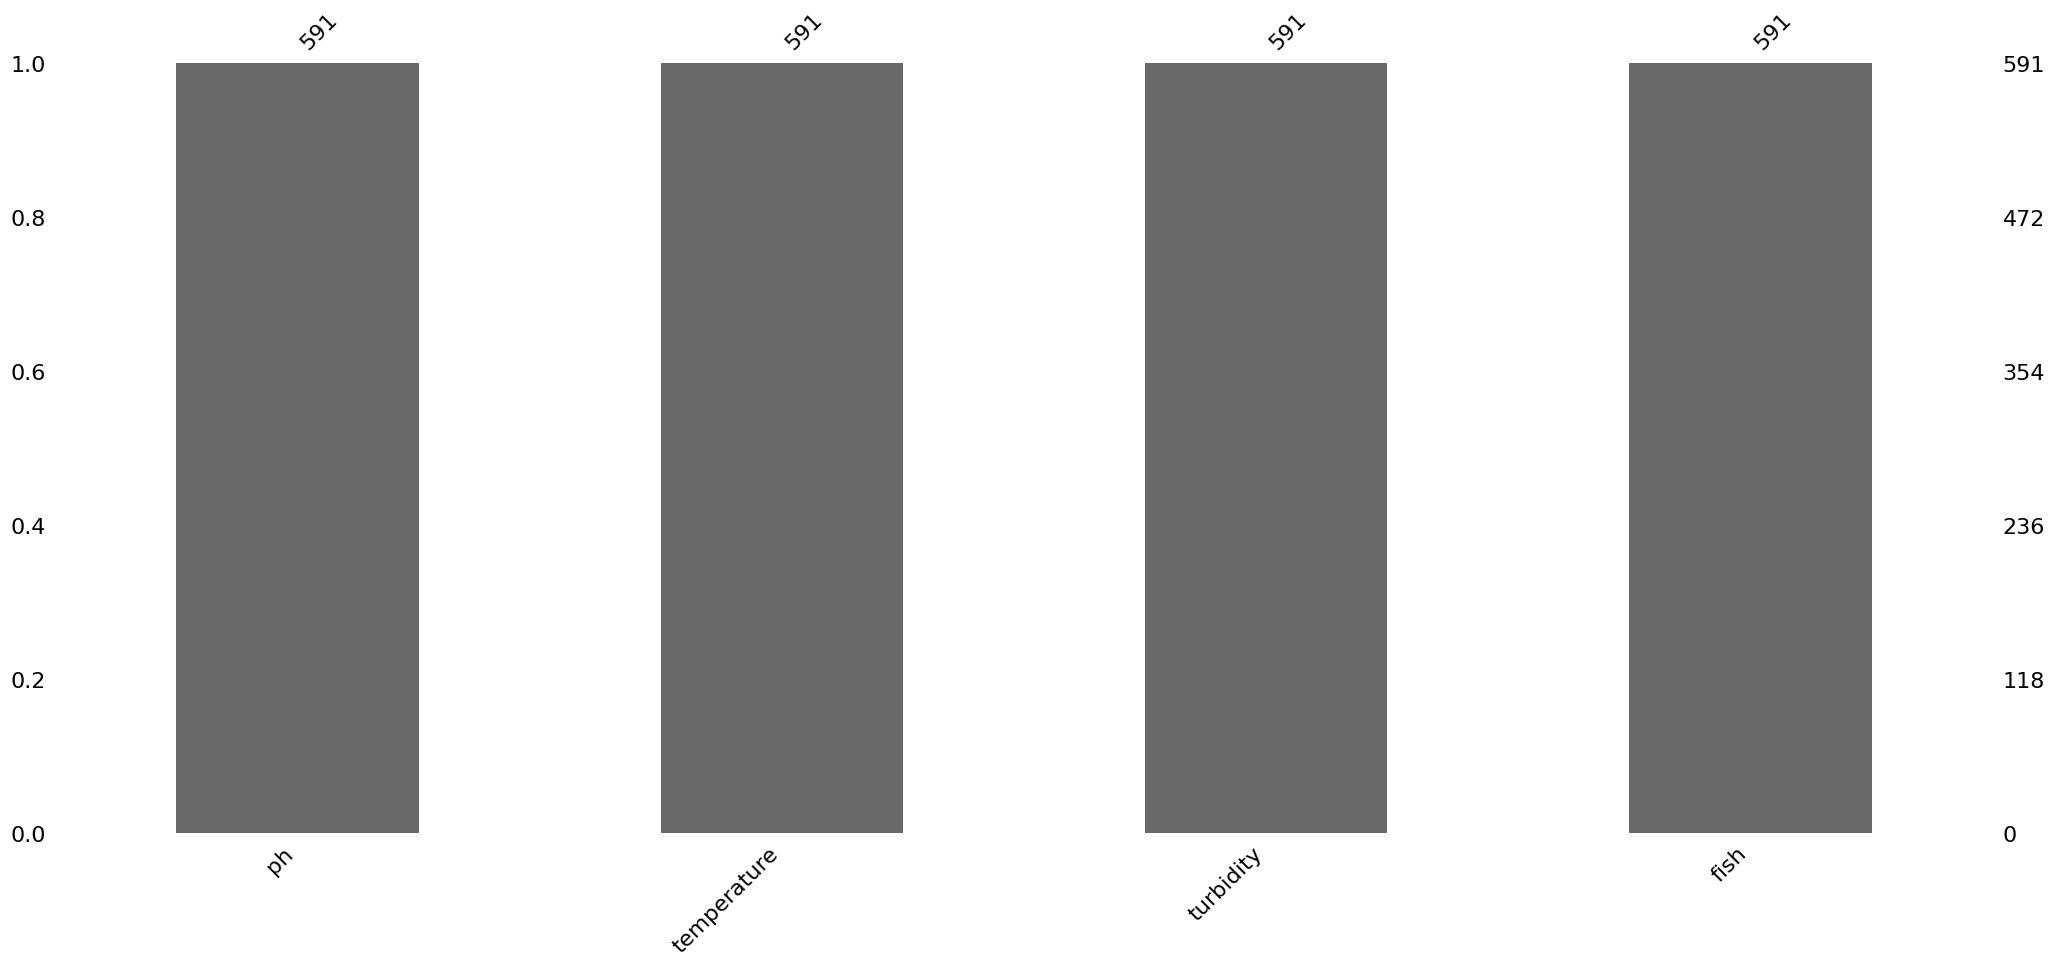

In [ ]:
# Program to visualize missing values in dataset
# Importing the libraries
import pandas as pd
import missingno as msno
msno.bar(data)

In [ ]:
data.describe()

,ph,temperature,turbidity
count,591.000000,591.000000,591.000000
mean,7.532115,21.789306,4.432944
std,0.810588,4.536612,2.169062
min,5.500000,4.000000,1.000000
25%,6.990000,17.940000,3.480000
50%,7.500000,21.060000,3.570000
75%,8.200000,24.000000,4.005000
max,9.000000,35.000000,15.800000


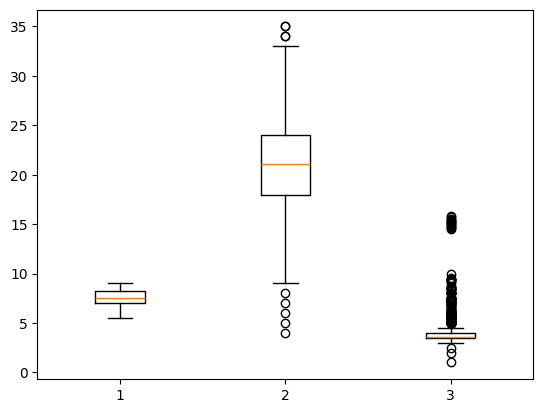

In [ ]:
# Creating plot
df=data[["ph","temperature","turbidity"]]
plt.boxplot(df)
# show plot
plt.show()

In [ ]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    #print(mean, std)
    for i in data:
        #print(i)
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [ ]:
import numpy as np
sample_outliers_pH = detect_outliers_zscore(data1['ph'])
print("Outliers in pH column from Z-scores method: ", sample_outliers_pH)
sample_outliers_temp = detect_outliers_zscore(data1['temperature'])
print("Outliers in temperature column from Z-scores method: ", sample_outliers_temp)
sample_outliers_turb = detect_outliers_zscore(data1['turbidity'])
print("Outliers in turbidity column from Z-scores method: ", sample_outliers_turb)

Outliers in pH column from Z-scores method:  []
Outliers in temperature column from Z-scores method:  [5.0, 7.0, 8.0, 4.0, 6.0]
Outliers in turbidity column from Z-scores method:  [14.5, 14.6, 14.7, 14.8, 14.9, 15.1, 15.2, 15.0, 15.3, 15.4, 15.5, 15.7, 15.8, 15.19]


In [ ]:
from scipy.stats import zscore
zph1 = np.abs(zscore(data['ph']))
ztemp1 = np.abs(zscore(data['temperature']))
zturb1 = np.abs(zscore(data['turbidity']))
data.head()

,ph,temperature,turbidity,fish
0,6.0,27.0,4.0,katla
1,7.6,28.0,5.9,sing
2,7.8,27.0,5.5,sing
3,6.5,31.0,5.5,katla
4,8.2,27.0,8.5,prawn


In [ ]:
data['zph'] = zph1
data['ztemp'] = ztemp1
data['zturb'] = zturb1

In [ ]:
data.head()

,ph,temperature,turbidity,fish,zph,ztemp,zturb
0,6.0,27.0,4.0,katla,1.891730,1.149560,0.199769
1,7.6,28.0,5.9,sing,0.083819,1.370176,0.676928
2,7.8,27.0,5.5,sing,0.330762,1.149560,0.492360
3,6.5,31.0,5.5,katla,1.274371,2.032022,0.492360
4,8.2,27.0,8.5,prawn,0.824650,1.149560,1.876618


In [ ]:
data['zph']

,zph
0,1.891730
1,0.083819
2,0.330762
3,1.274371
4,0.824650
...,...
586,0.570582
587,0.669359
588,0.817525
589,1.052122


In [ ]:
outliers_ph=len(data[data['zph']>3])
outliers_temp=len(data[data['ztemp']>3])
outliers_turb=len(data[data['zturb']>3])

In [ ]:
print("outliers in ph",outliers_ph)
print("outliers in temp",outliers_temp)
print("outliers in turb",outliers_turb)

outliers in ph 0
outliers in temp 5
outliers in turb 0


In [ ]:
data_z = data[data['zph']<3]
data_z = data[data['ztemp']<3]
data_z = data[data['zturb']<3]
data_z

,ph,temperature,turbidity,fish,zph,ztemp,zturb
0,6.00,27.00,4.00,katla,1.891730,1.149560,0.199769
1,7.60,28.00,5.90,sing,0.083819,1.370176,0.676928
2,7.80,27.00,5.50,sing,0.330762,1.149560,0.492360
3,6.50,31.00,5.50,katla,1.274371,2.032022,0.492360
4,8.20,27.00,8.50,prawn,0.824650,1.149560,1.876618
...,...,...,...,...,...,...,...
586,7.07,21.12,3.57,sing,0.570582,0.147659,0.398179
587,6.99,21.19,3.56,sing,0.669359,0.132216,0.402793
588,6.87,21.00,3.56,sing,0.817525,0.174133,0.402793
589,6.68,21.19,3.58,sing,1.052122,0.132216,0.393565


In [ ]:
data=data_z.drop(['zph', 'ztemp', 'zturb'], axis=1)
data

,ph,temperature,turbidity,fish
0,6.00,27.00,4.00,katla
1,7.60,28.00,5.90,sing
2,7.80,27.00,5.50,sing
3,6.50,31.00,5.50,katla
4,8.20,27.00,8.50,prawn
...,...,...,...,...
586,7.07,21.12,3.57,sing
587,6.99,21.19,3.56,sing
588,6.87,21.00,3.56,sing
589,6.68,21.19,3.58,sing


In [ ]:
file_name = 'Aqua-Data.xlsx'
data.to_excel(file_name)

In [5]:
data=pd.read_csv("/content/realfishdataset - Kaggle - numerical-class.csv")
data.head()

,ph,temperature,turbidity,fish
0,6.0,27.0,4.0,1
1,7.6,28.0,5.9,9
2,7.8,27.0,5.5,9
3,6.5,31.0,5.5,1
4,8.2,27.0,8.5,5


In [14]:
# class count
fish_samples = data['fish'].value_counts()

# Separate class
class_0 = data[data['fish'] == 0]
class_1 = data[data['fish'] == 1]# print the shape of the class
class_2 = data[data['fish'] == 2]
class_3 = data[data['fish'] == 3]# print the shape of the class
class_4 = data[data['fish'] == 4]
class_5 = data[data['fish'] == 5]# print the shape of the class
class_6 = data[data['fish'] == 6]
class_7 = data[data['fish'] == 7]# print the shape of the class
class_8 = data[data['fish'] == 8]# print the shape of the class
class_9 = data[data['fish'] == 9]
class_10 = data[data['fish'] == 10]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('class 2:', class_2.shape)
print('class 3:', class_3.shape)
print('class 4:', class_4.shape)
print('class 5:', class_5.shape)
print('class 6:', class_6.shape)
print('class 7:', class_7.shape)
print('class 8:', class_8.shape)
print('class 9:', class_9.shape)
print('class 10:', class_10.shape)

class 0: (33, 4)
class 1: (58, 4)
class 2: (15, 4)
class 3: (11, 4)
class 4: (78, 4)
class 5: (14, 4)
class 6: (99, 4)
class 7: (50, 4)
class 8: (55, 4)
class 9: (49, 4)
class 10: (129, 4)


In [11]:
fish_samples

,count
fish,
10,129
6,99
4,78
1,58
8,55
7,50
9,49
0,33
2,15


<Axes: title={'center': 'count (target)'}, xlabel='fish'>

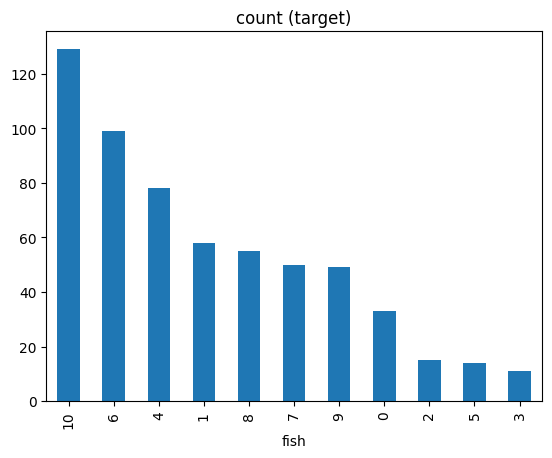

In [15]:
data['fish'].value_counts().plot(kind='bar', title='count (target)')

<Axes: title={'center': 'count (target)'}, xlabel='fish'>

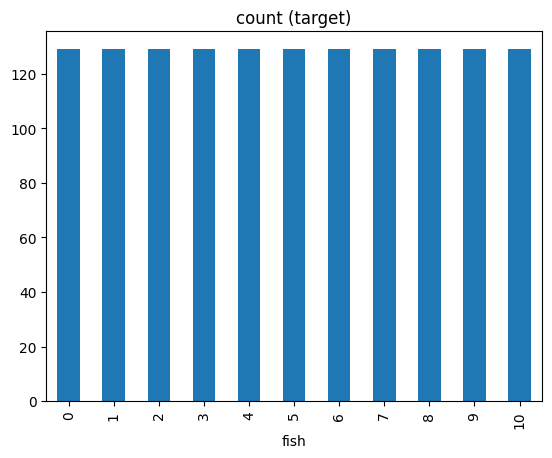

In [21]:
class_0_over = class_0.sample(129, replace=True)
class_1_over = class_1.sample(129, replace=True)
class_2_over = class_2.sample(129, replace=True)
class_3_over = class_3.sample(129, replace=True)
class_4_over = class_4.sample(129, replace=True)
class_5_over = class_5.sample(129, replace=True)
class_6_over = class_6.sample(129, replace=True)
class_7_over = class_7.sample(129, replace=True)
class_8_over = class_8.sample(129, replace=True)
class_9_over = class_9.sample(129, replace=True)


test_over = pd.concat([class_0_over,class_1_over,class_2_over,class_3_over,class_4_over,class_5_over,class_6_over,class_7_over,class_8_over,class_9_over,class_10], axis=0)

#print("total class of 1 and 0:",test_under['Class'].value_counts())# plot the count after under-sampeling
test_over['fish'].value_counts().plot(kind='bar', title='count (target)')

In [22]:
test_over

,ph,temperature,turbidity,fish
105,7.00,5.00,5.00,0
127,7.50,23.00,6.40,0
118,7.10,31.00,7.20,0
107,7.20,15.00,7.00,0
129,7.00,27.00,8.40,0
...,...,...,...,...
512,8.66,17.87,3.45,10
513,8.74,17.94,3.41,10
514,8.57,17.87,3.46,10
529,8.79,17.94,3.50,10


In [24]:
file_name = 'Aqua-Data-Over-Sample.xlsx'
test_over.to_excel(file_name)